# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

In [1]:
import numpy as np 
import pandas as pd

In [4]:
import matplotlib.pyplot as ply
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv(r'C:\Users\Asus\Desktop\course materials\portela data science\Refactored_Py_DS_ML_Bootcamp-master\10-Data-Capstone-Projects\911.csv')

** Check the info() of the df **

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [12]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [13]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

** We take a look at the 'title' column, how many unique title codes are there? **

In [14]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [15]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [17]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [18]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [19]:
df['Reason'].value_counts().head()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

** Now we use seaborn to create a countplot of 911 calls by Reason. **

<Axes: xlabel='Reason', ylabel='count'>

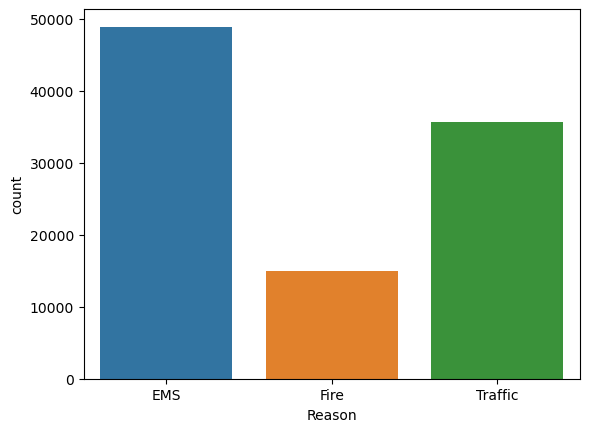

In [20]:
sns.countplot(x ='Reason' ,data = df )

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [23]:
type(df['timeStamp'].iloc[0])

str

** we have seen that these timestamps are still strings. Use [pd.to_datetime] to convert the column from strings to DateTime objects. **

In [24]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [25]:
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['day_of_week'] = df['timeStamp'].apply(lambda time : time.dayofweek)

In [26]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [27]:
dmap = {0 :'Mon' ,1 : 'Tue', 2: 'Wed' ,4 : 'Fri' , 5 : 'sat' , 6 :'sun'}

In [28]:
df['day_of_week'] = df['day_of_week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

In [29]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,NaN


<Axes: xlabel='day_of_week', ylabel='count'>

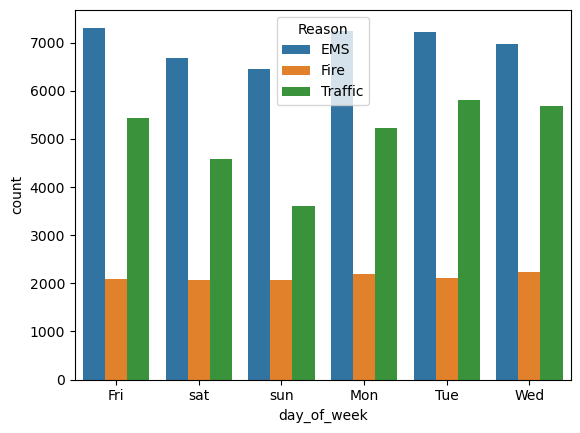

In [30]:
sns.countplot(x='day_of_week' , data = df , hue = 'Reason')

**Now we do the same for Month:**

<Axes: xlabel='Month', ylabel='count'>

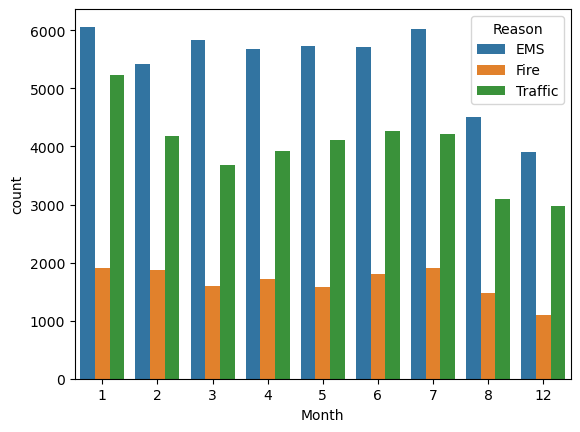

In [31]:
sns.countplot(x='Month' , data = df , hue = 'Reason')

In [33]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,day_of_week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,11621
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,9871
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,9201
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,9725
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,9833


** Now we create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='Month'>

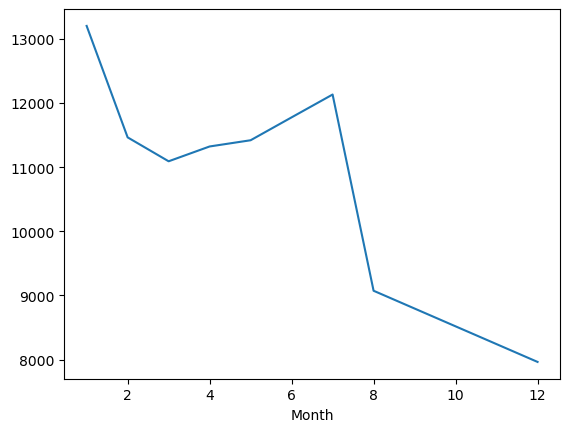

In [35]:
byMonth['twp'].plot()

** Now  we see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

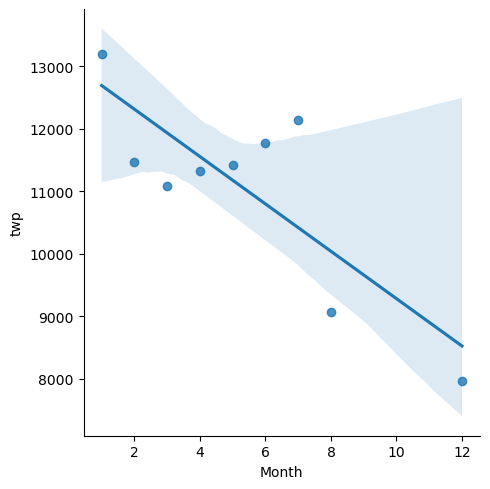

In [40]:
sns.lmplot(x='Month' , y = 'twp' , data = byMonth.reset_index())

** We create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [41]:
df['Date'] = df['timeStamp'].apply(lambda te : te.date())

In [42]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,day_of_week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,NaN,2015-12-10


** Now we groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

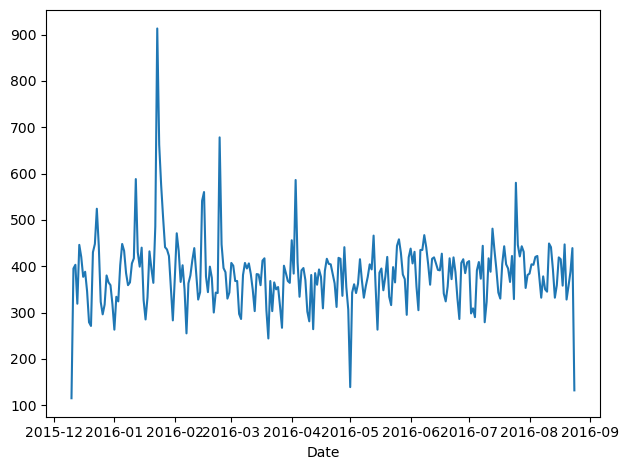

In [45]:
df.groupby('Date').count()['twp'].plot()
ply.tight_layout()

In [51]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

** Now we recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

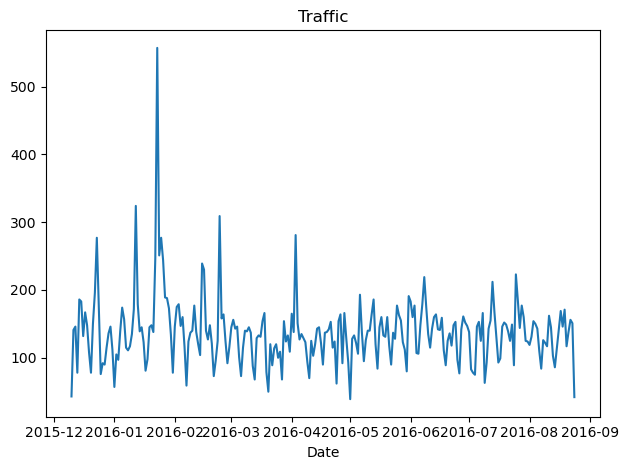

In [52]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
ply.title('Traffic')
ply.tight_layout()

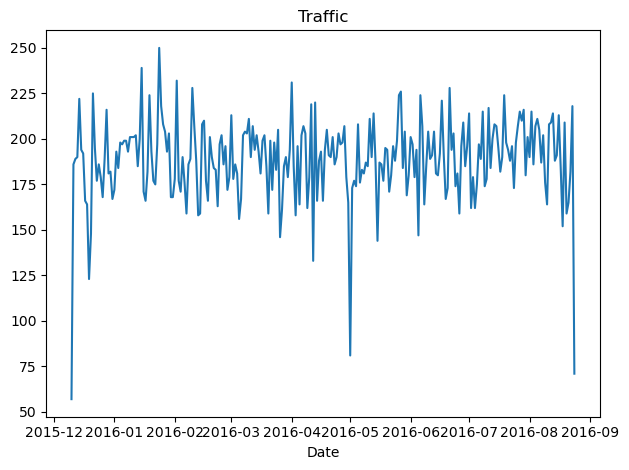

In [53]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
ply.title('EMS')
ply.tight_layout()

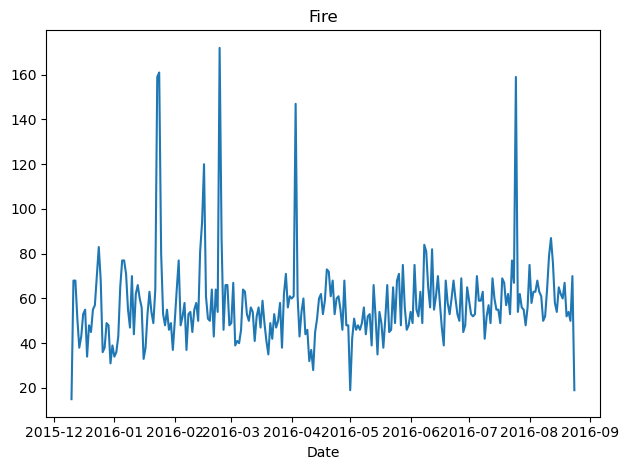

In [54]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
ply.title('Fire')
ply.tight_layout()

In [58]:
dayHour = df.groupby(by=['day_of_week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467


** Now we create a HeatMap using this new DataFrame. **

<Axes: xlabel='Hour', ylabel='day_of_week'>

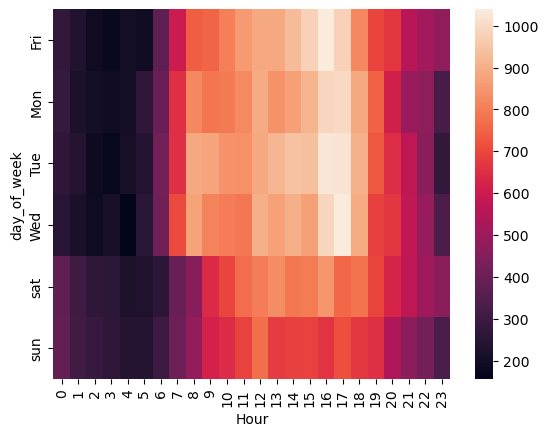

In [60]:
sns.heatmap(dayHour)

** Now we create a clustermap using this DataFrame. **

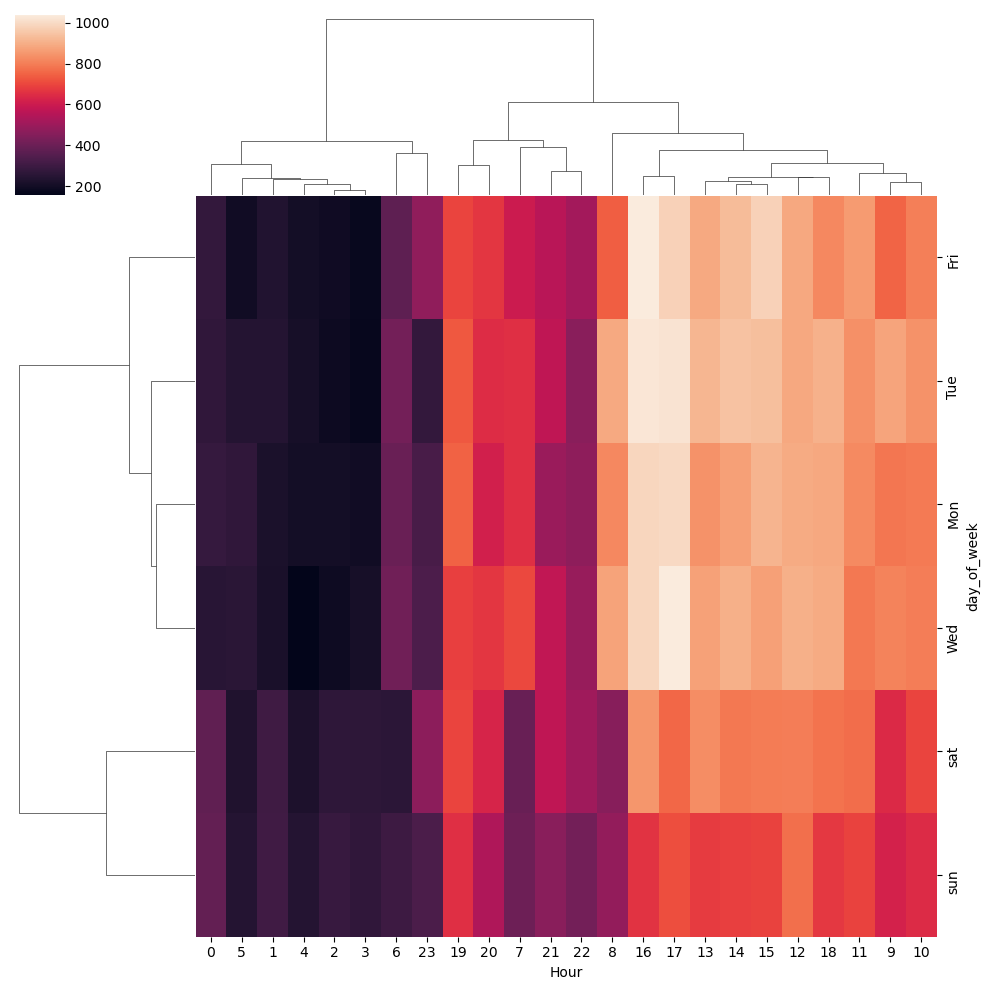

In [61]:
sns.clustermap(dayHour)

** Now we repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [65]:
dayMonth = df.groupby(by=['day_of_week','Month']).count()['Reason'].unstack()
dayMonth.head(3)

Month,1,2,3,4,5,6,7,8,12
day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234


<Axes: xlabel='Month', ylabel='day_of_week'>

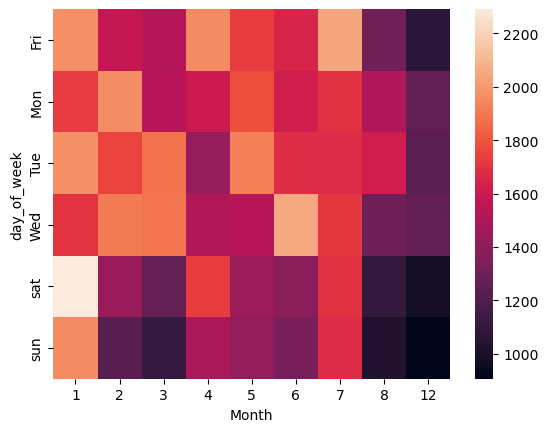

In [66]:
sns.heatmap(dayMonth)

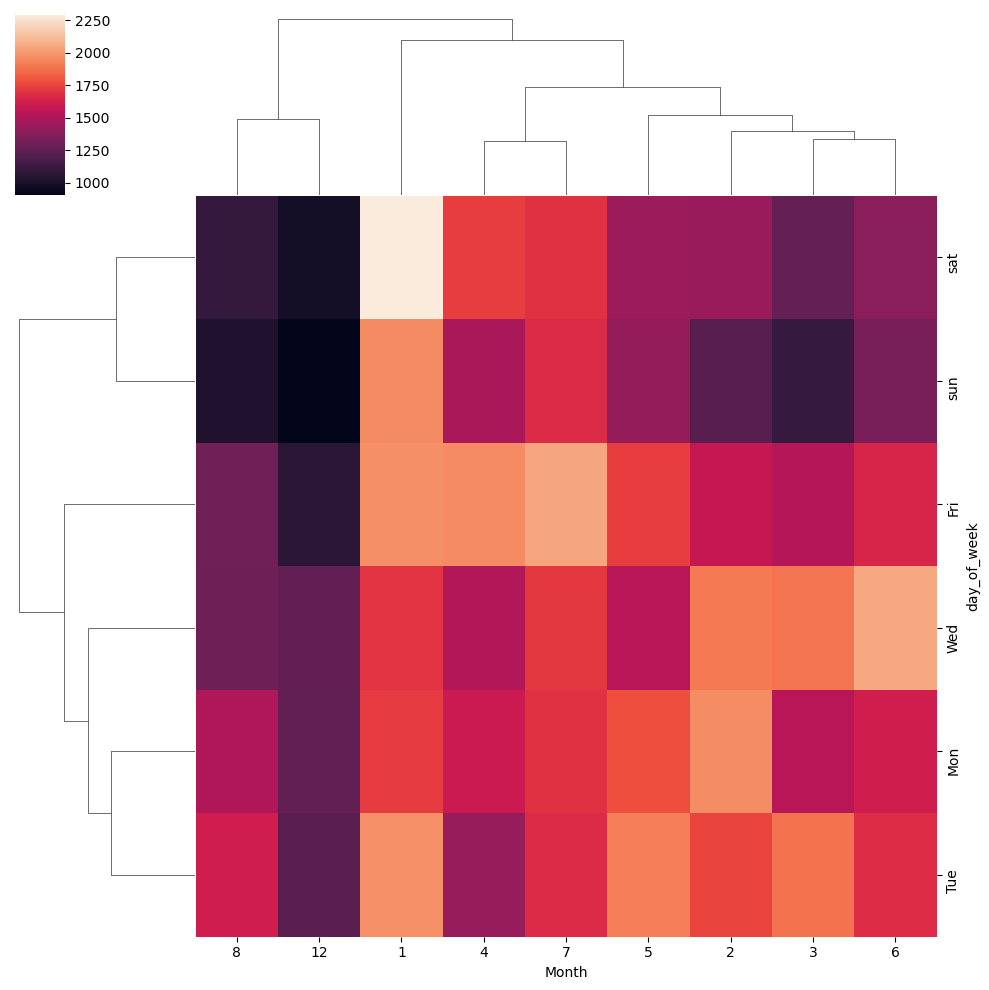

In [67]:
sns.clustermap(dayMonth)

# Thank You